<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-make-it-aesthetic/blob/master/MakeItAesthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it Aesthetic

# Table of Content
 1 Introduction
 
 2 Goals and Use Cases
  
 2.1 Our Goals

 2.2 Use Cases

 3 Theory and Methods
 
 4 Process
 
 5 Literature

# 1 Introduction

Photos are taken for various reasons.

Someone wants to document some situations, others want to keep their experience in memory. And someone takes photos because of art reasons. 

Almost everybody makes photos but not every photograph fulfills the criteria of an aesthetic photo. To change this we aim to be able to make every photo aesthetic. To reach this goal it is necessary to define the rules of an aesthetic photo and to define which object is the main object of the photo. These goals are described in the following chapter.



# 2 Goals and Use Cases
## 2.1 Goals
* make given images aesthetic

* selecting the guideline the image should follow

* Rule of Thirds

* Diagonal Dominance

* Visual Balance

* Golden Ratio

* by zooming and rotation the image

## 2.2 Use Cases
* making photos more aethstic for an photo album or for a website
  * vacation
    * sightseeing photos of buildings
    * nature photos of landscapes and detailed plants
  * wedding and over big events photos of people
  * art photos of detailed motives
* let the algorithms editing all your photos instead of doing it manually

# 3 Theory and Methods

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAJ7LcNQXUT0an5uu2FO_uclWl8MCq0wINJNh3oLrs-shr3_Hb5A)


Golden Ratio

![alt text](https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fencrypted-tbn0.gstatic.com%2Fimages%3Fq%3Dtbn%3AANd9GcQDsh2JSGxEuiQueDxc8Nv3exWChiSh6WRxRrh_LeffSCXFbiysFA&sp=008dda95fde15b3ee8aea0de9351ca23&anticache=923965)


Diagonal Dominance

![alt text](https://ianfrithrn.files.wordpress.com/2012/05/reduced1.jpg)

#4 Process

Import of important packages

In [0]:
import numpy as np
import cv2
from skimage import io
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from PIL import Image

Import of pictures

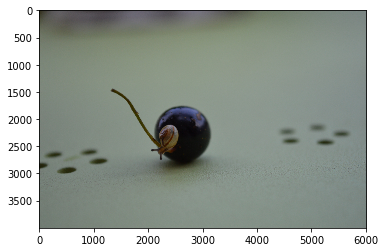

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/snail.JPG
img_snail = cv2.imread("snail.JPG") #gives the picture a variable
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB) #turns the color into the right color
plt.imshow(img_snail) #gives the picture out

Now we can see the image. The next step is to find out the size of the image in the x-axis (width of image) and in the y-axis (height of image). That happens with the **shape** function.

Now we can divide the width with 512 and the height with 512 by 3 to calculate the positions for the lines of the **Rule of Thirds**.

Now we calculated the position of the first line in the height of the image. Because the height of the image is equal to the width we already calculated the line in the width of the image. The second line will be at the position 170.666 + 170.666 = 341.332.

Now we are able to draw the line into the image with the **cv2.line()** function. Therefore we have to know to points: For 

In this function the photo will be preprocessed in the sense that it determines the size of the image. Therefore we use the **shape**-function of *open CV*. To calculate the first line for the RT it divides the height (resp. the width) of the photo by 3. Therefore the "//" operator is used since we need integer values for the further processing. For the second horizontal line the height is divided by 3 too but now the result is multiplied by 2. Similarly for the vertical line.


In [0]:
def generate_image_data(img):
  height = img.shape[0]
  width = img.shape[1]

  #calulating the lines for the rule of thirds
  third_of_height_1 = height // 3
  third_of_height_2 = (height // 3) * 2
  third_of_width_1 = width // 3
  third_of_width_2 = (width // 3) * 2
  return height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2


The following function called **draw_rule_of_thirds** is used to draw the lines of the *Rule of Thirds* (RT) on the given photo. The function requireds an object of type *img*, the colour the lines should appear and the line width for the RT-lines. It returns an object of type *img*.

After the preprocessing in the **generate_image_data** function we have all information to draw the RT-lines. Therefore we use the **axhline**-function of *matplotlib* for the horizontal lines and similarly the **axvline**-function for the vertical lines. Since we have images with different colours we have to draw the RT-lines in black or white depending on the average colour of the picture. To determine the average colour we add up all pixels of the gray version of the image and divide the sum by total amount of pixels of the image matrix.

At the end the function returns the photo with the RT-lines on it. The RT-lines are shown in a different layer as the image is shown. Since we do not want to have the line in the image later on.


In [0]:
def draw_rule_of_thirds(img):
  #calulating the height and width of the image and the lines for the rule of thirds
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

  #calculating the average_brightness of the image
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  average_brightness = img_gray.sum() // (len(img_gray)*len(img_gray[0]))
 

  #define the line color in dependence of the brightness
  if average_brightness >= 129:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'k')
    plt.axhline(y = third_of_height_2, color = 'k')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'k')
    plt.axvline(x = third_of_width_2, color = 'k')
  else:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'w')
    plt.axhline(y = third_of_height_2, color = 'w')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'w')
    plt.axvline(x = third_of_width_2, color = 'w')
  return img

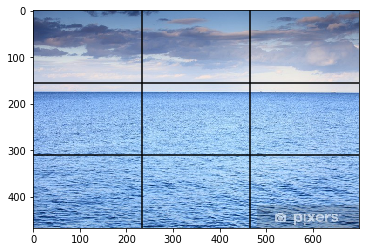

In [0]:
img = cv2.imread("goodhorizon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rt_original = draw_rule_of_thirds(img)
plt.imshow(rt_original)

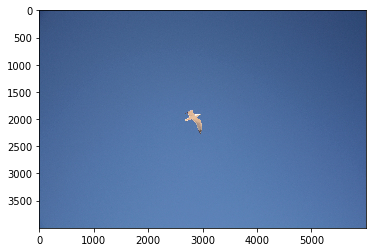

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moewe.JPG
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
plt.imshow(img_seagull)

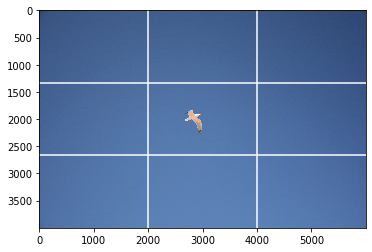

In [0]:
draw_rule_of_thirds(img_seagull)
plt.imshow(img_seagull)

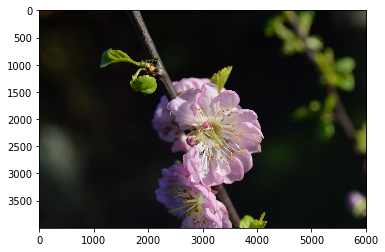

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/flower.JPEG
img = cv2.imread("flower.JPEG")
img_flower = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_flower)

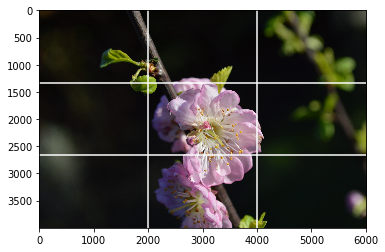

In [0]:
draw_rule_of_thirds(img_flower)
plt.imshow(img_flower)

### Calculation of the points of interests
Now we determine the **points of interest** by calculating the intersections of the lines.


In [0]:
def poi(img):
  width, height, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 =generate_image_data(img)

  poi1 = tuple([third_of_height_1, third_of_width_1])
  poi2 = tuple([third_of_height_1, third_of_width_2])
  poi3 = tuple([third_of_height_2, third_of_width_1])
  poi4 = tuple([third_of_height_2, third_of_width_2])

  print(poi1)
  print(poi2)
  print(poi3)
  print(poi4)

In [0]:
poi(img_snail)

(1333, 2005)
(1333, 4010)
(2666, 2005)
(2666, 4010)


# Detect Horizons

Test by Konrad, erosion dilation

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11),2)
edges = cv2.Canny(blur,50,150,apertureSize = 3)
plt.imshow(edges, 'gray')


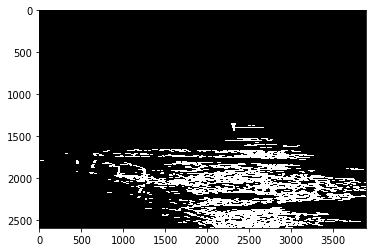

In [0]:
kernel = np.ones((2,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 3)
plt.imshow(dilation, 'gray')

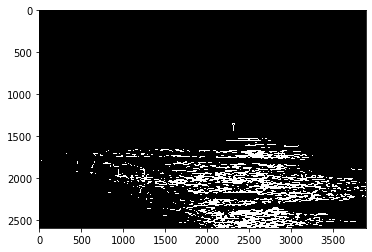

In [0]:
erosion = cv2.erode(dilation,kernel,iterations = 2)
plt.imshow(erosion, 'gray')

In [0]:
def roi(img, vertices):
    #blank mask:
    mask = np.zeros_like(img)
    # fill the mask
    cv2.fillPoly(mask, vertices, 255)
    # now only show the area that is the mask
    masked = cv2.bitwise_and(img, mask)
    return masked

In [0]:
def process_img(img):
    height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

    vertices = np.array([[0,third_of_height_1],[width,third_of_height_1], [width,third_of_height_2],[0,third_of_height_2]], np.int32)
    processed_img = roi(img, [vertices])
    
    return processed_img

In [0]:
def detect_horizon(img):
  result = np.copy(img)
  #preprocessing of the image to detect lines
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (9,9),2)
  edges = cv2.Canny(blur,50,150,apertureSize = 3)
  processed_img = process_img(edges)

  

  #dilate and erose the binary image to extract better lines
  kernel = np.ones((2,10),np.uint8)
  dilation = cv2.dilate(processed_img,kernel,iterations = 3)
  erosion = cv2.erode(dilation,kernel,iterations = 2)

  #get the width of the image to calculate the minimal length of the line in the
  #image in dependence of the width of the image
  height, width, third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(dilation)
  
  #define the arguments for the function of the Hough Line Transformation
  rho = 1  # distance resolution in pixels of the Hough grid
  theta = np.pi / 180  # angular resolution in radians of the Hough grid
  threshold = 15  # minimum number of votes (intersections in Hough grid cell)
  min_line_length = int(width*0.05)  # minimum number of pixels making up a line
  max_line_gap = 80  # maximum gap in pixels between connectable line segments
  line_image = np.copy(img) * 0  # creating a blank to draw lines on

  # Run Hough on edge detected image
  # Output "lines" is an array containing endpoints of detected line segments
  lines = cv2.HoughLinesP(dilation, rho, theta, threshold, np.array([]),
                   min_line_length, max_line_gap)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        #print(x1,y1,x2,y2)
        #draw the detected lines into the image
        image_line = cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        lines_edges = cv2.addWeighted(result, 0.8, line_image, 1, 0)
    return img, edges, dilation, erosion, image_line, lines_edges, lines
  else: #if no lines are detected
    print("Konnte leider keine Linien erkennen.") 

In [0]:
def get_Coordinates_of_horizon(lines):
  start_point = tuple(lines[0][0],lines[0][1])
  last_row, last_column = lines.shape
  print(last_row)
  end_point = tuple(lines[n][2],lines[n][3])

#Examples

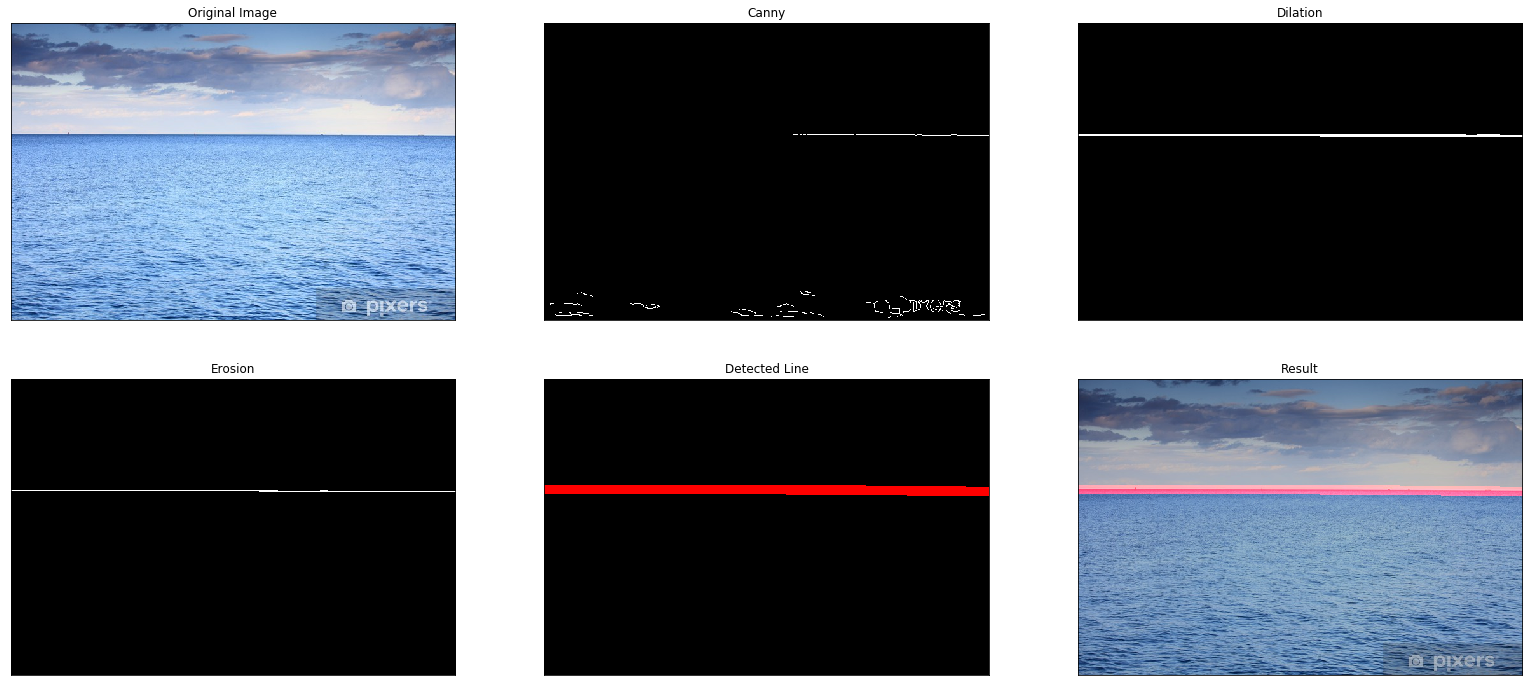

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
#get_Coordinates_of_horizon(lines)

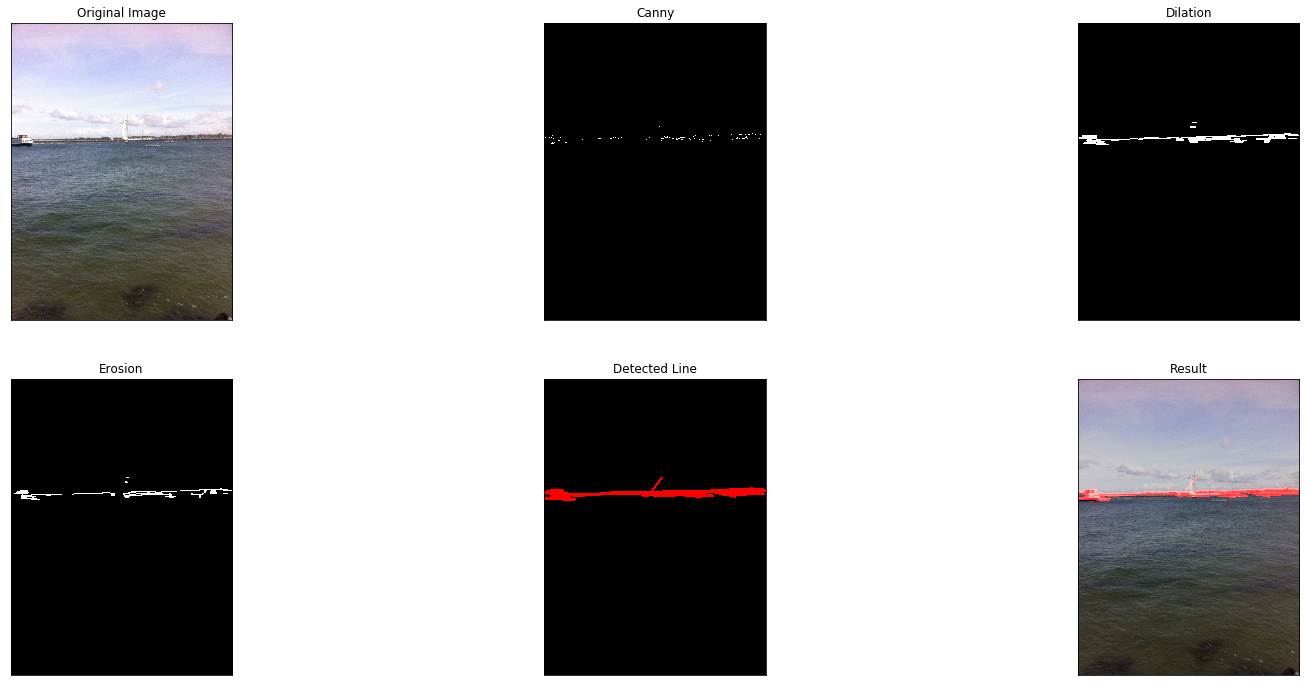

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex5.JPG
img = cv2.imread('ex5.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

626


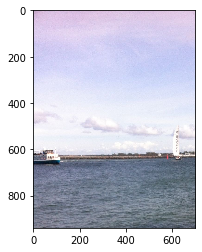

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex5.JPG
img = cv2.imread('ex5.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

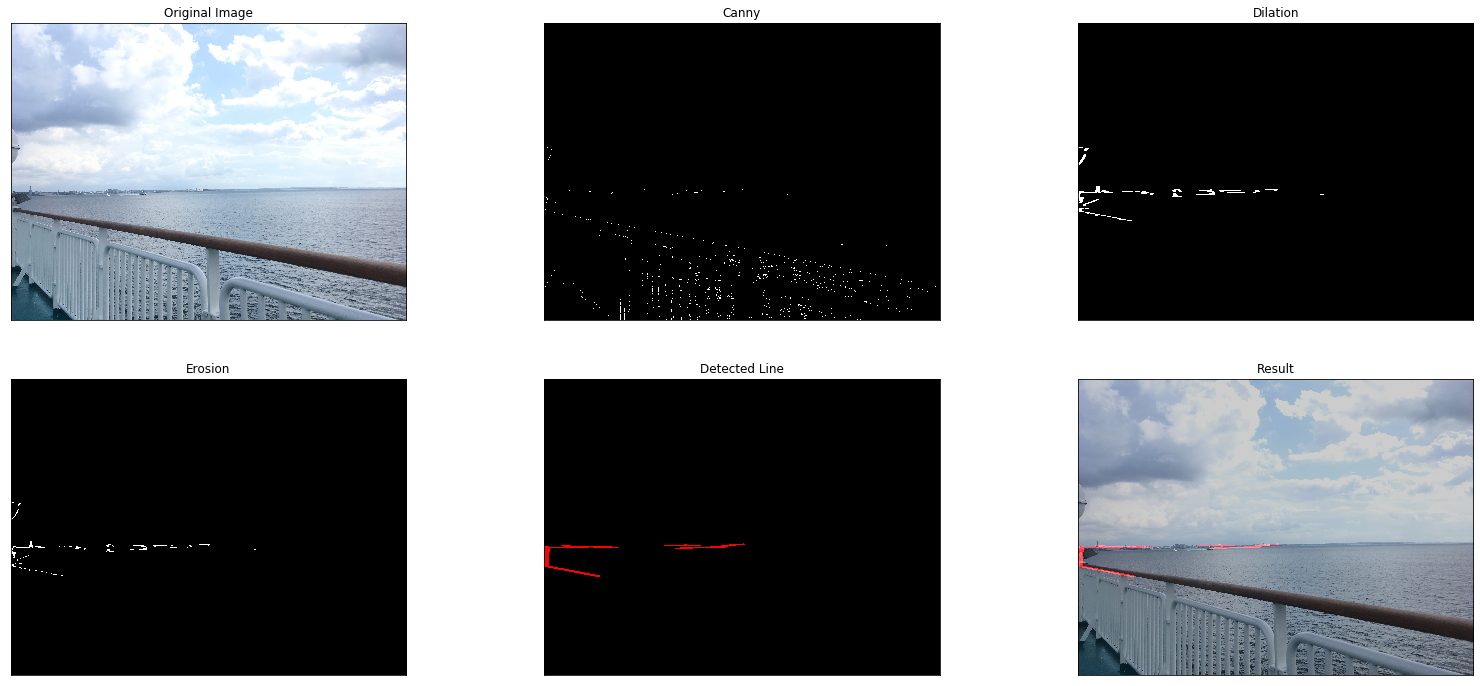

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex6.JPG
img = cv2.imread('ex6.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1724


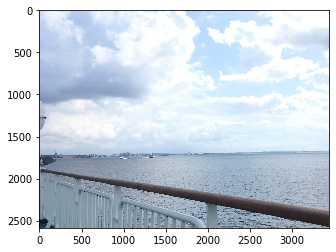

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/ex6.JPG
img = cv2.imread('ex6.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

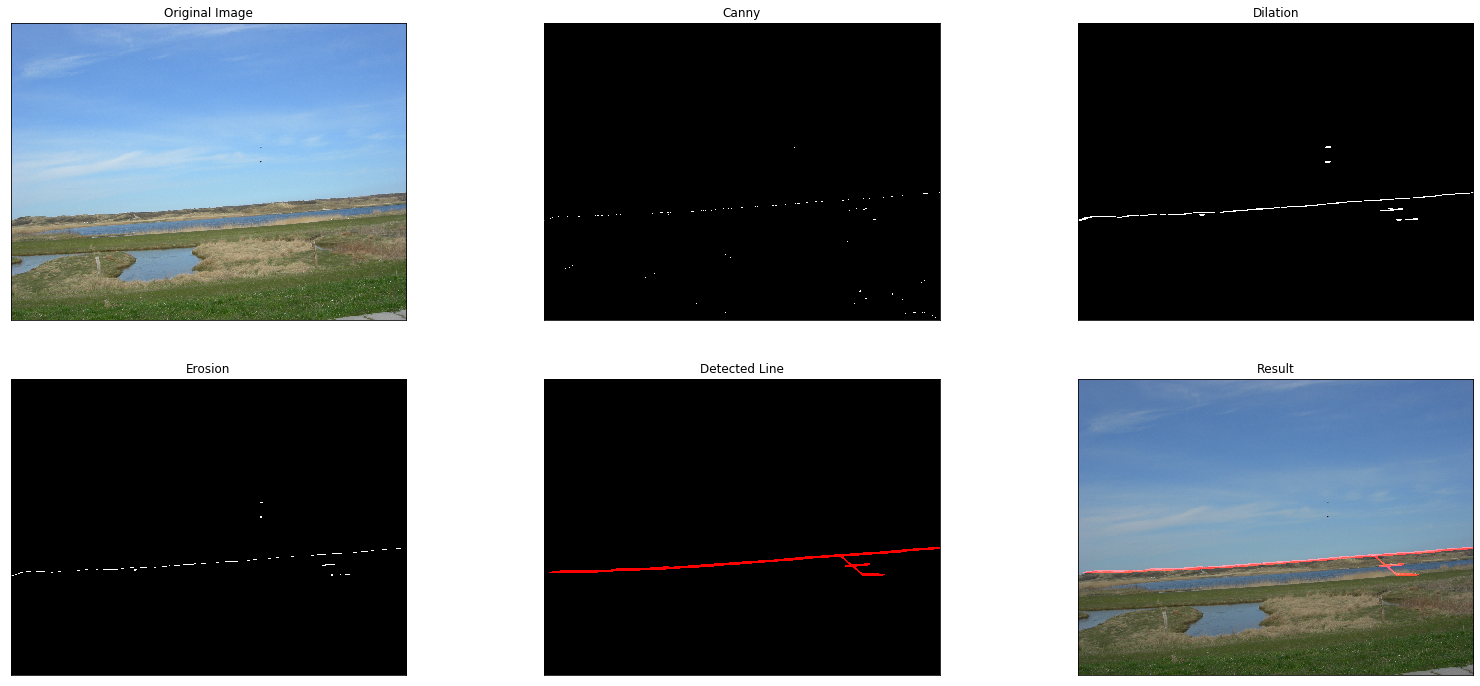

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/DSCN0053.jpg
img = cv2.imread('DSCN0053.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

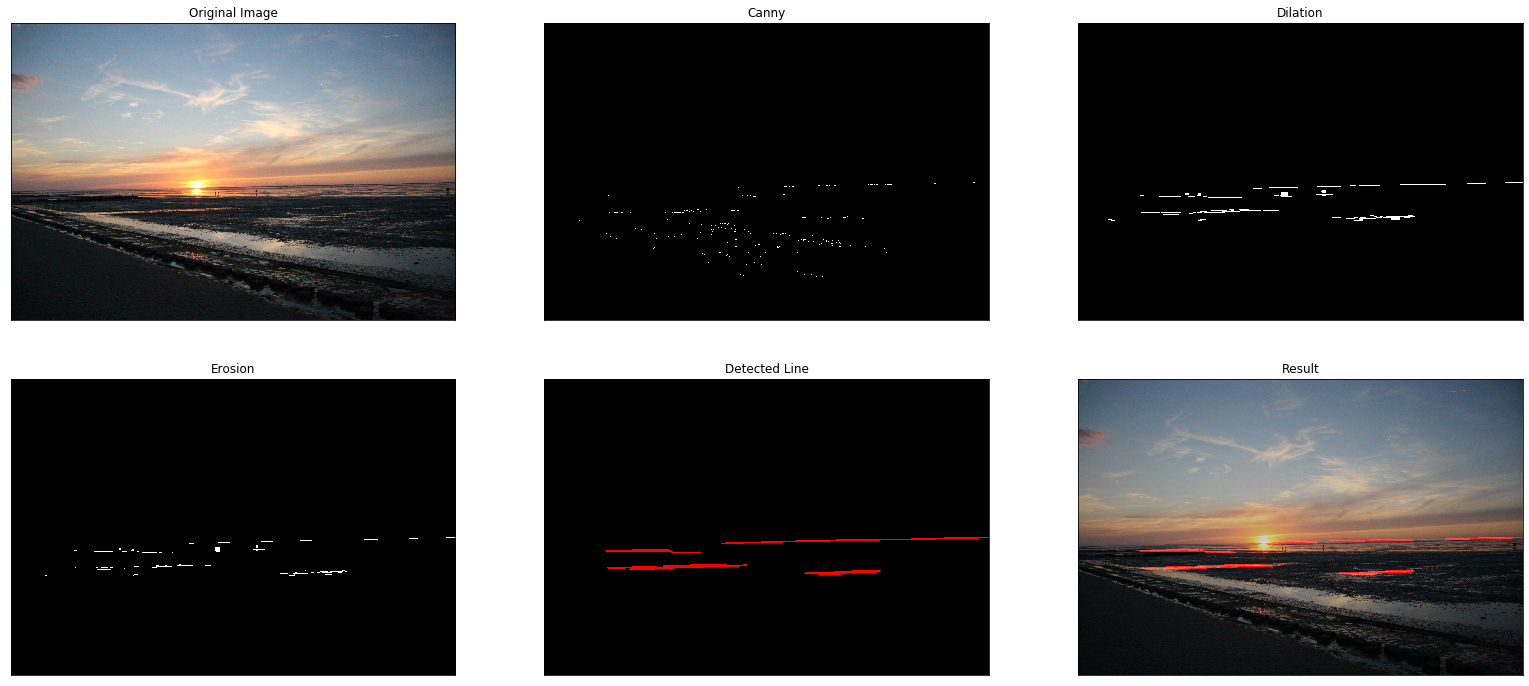

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1374.JPG
img = cv2.imread('IMG_1374.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

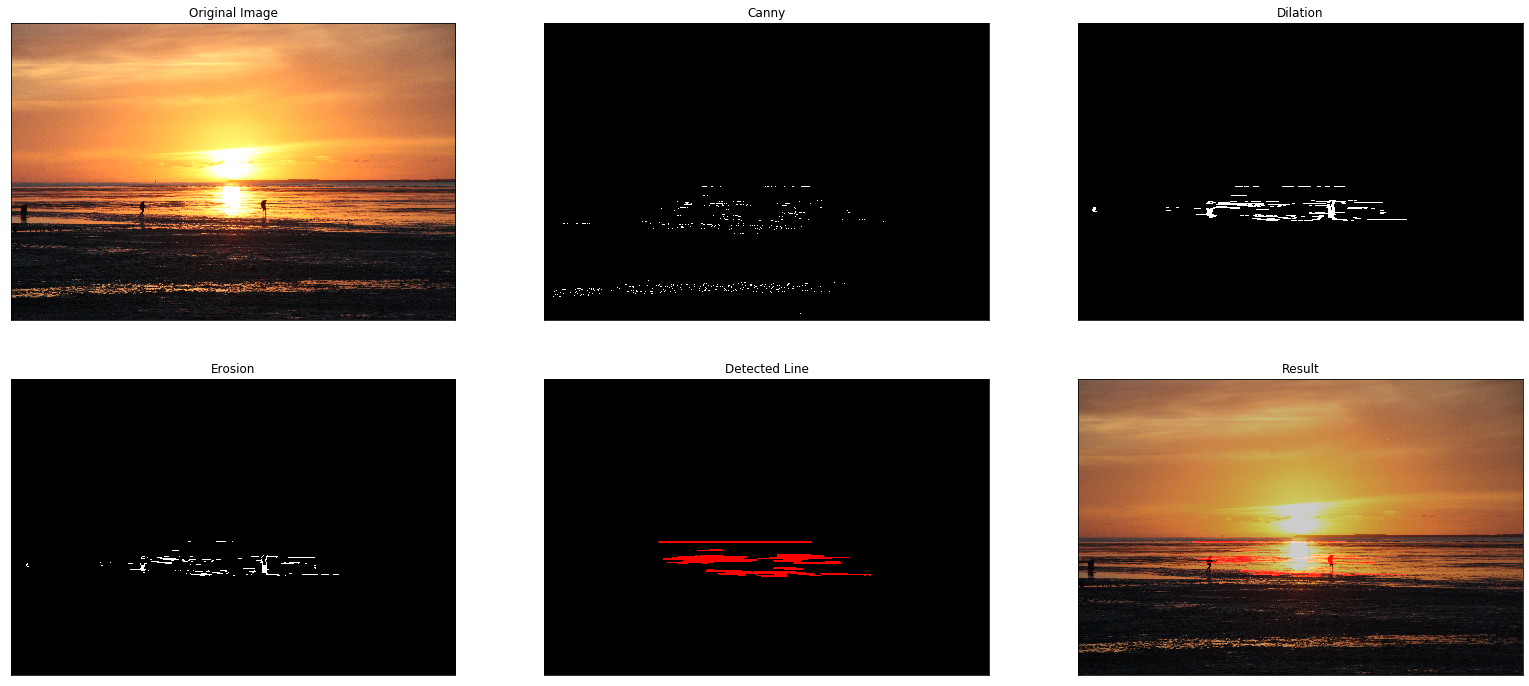

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1370.JPG
img = cv2.imread('IMG_1370.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1570


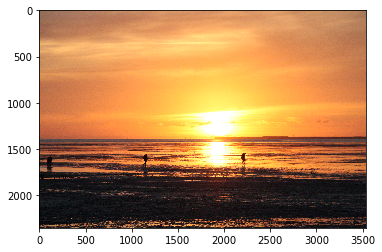

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1370.JPG
img = cv2.imread('IMG_1370.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

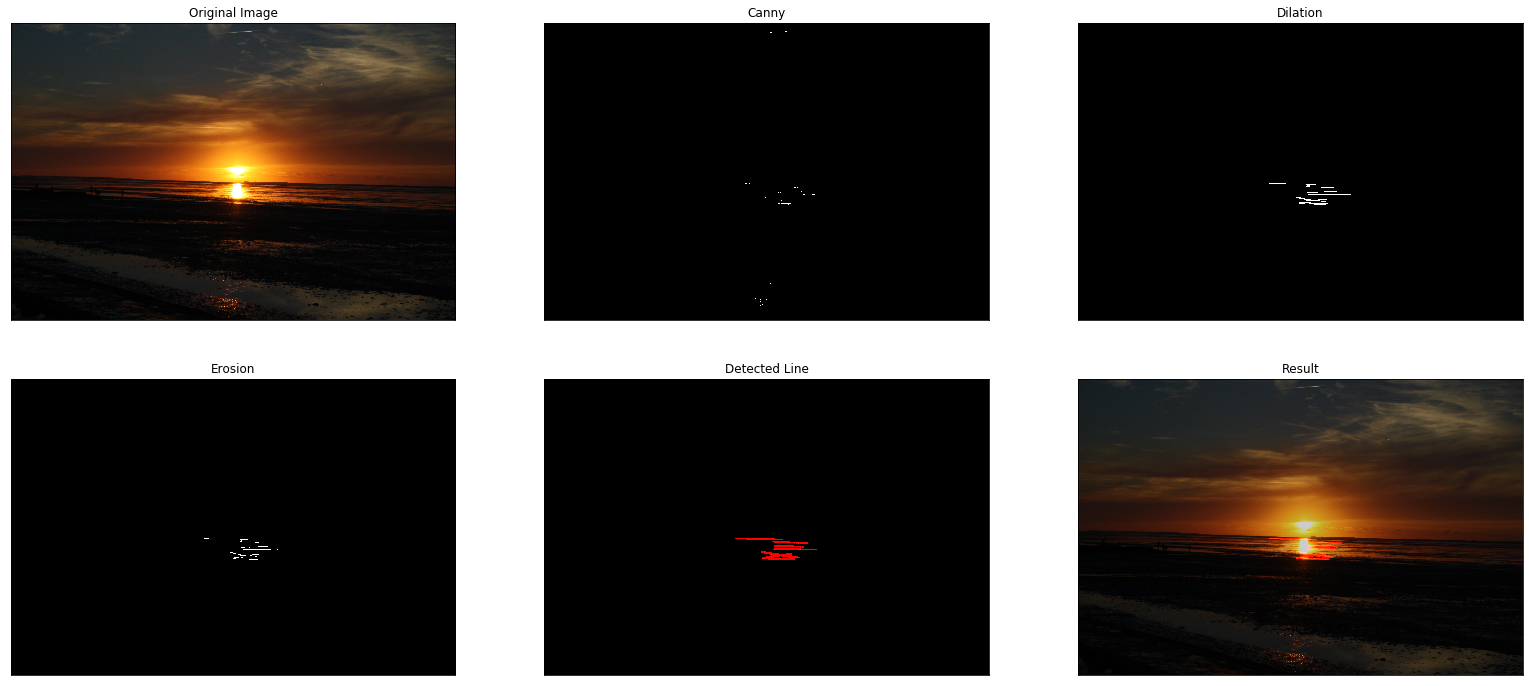

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1363.JPG
img = cv2.imread('IMG_1363.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

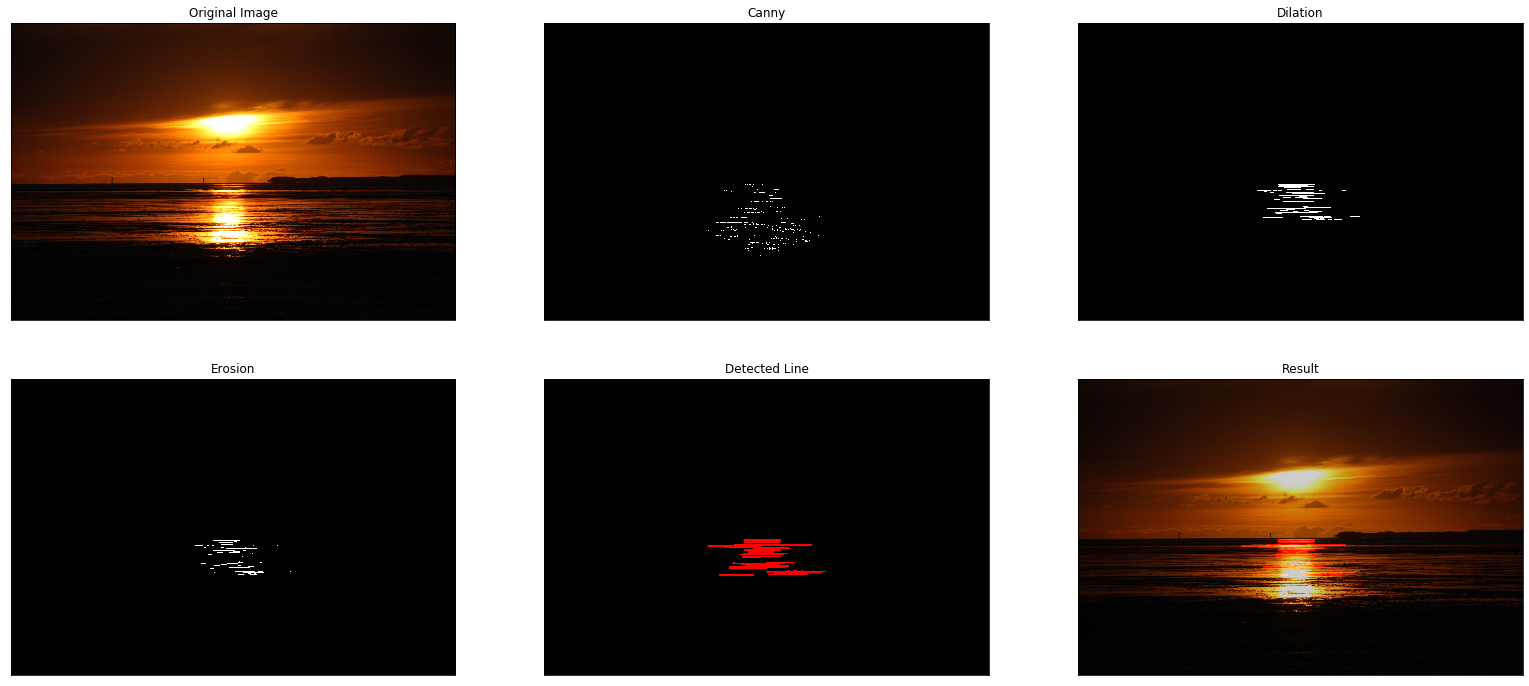

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1359.JPG
img = cv2.imread('IMG_1359.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

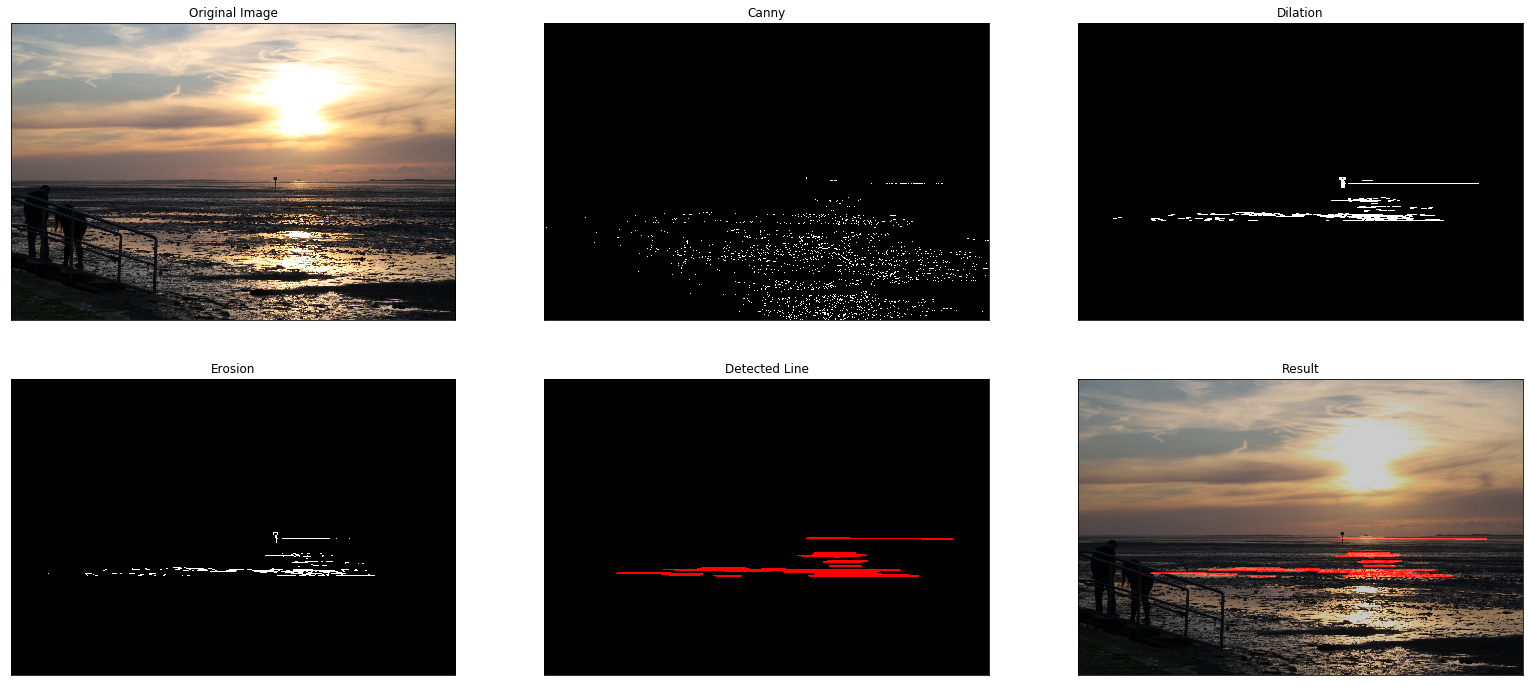

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1334.JPG
img = cv2.imread('IMG_1334.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img, edges, dilation, erosion, image_line, lines_edges, lines = detect_horizon(img)
titles = ['Original Image', 'Canny',
            'Dilation', 'Erosion', 'Detected Line', 'Result']
images = [img, edges, dilation, erosion, image_line, lines_edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#Crop

1696


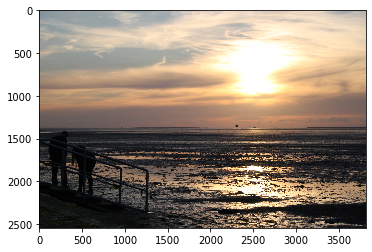

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1334.JPG
img = cv2.imread('IMG_1334.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

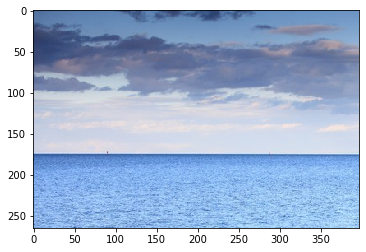

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
img = cv2.imread('goodhorizon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

1400


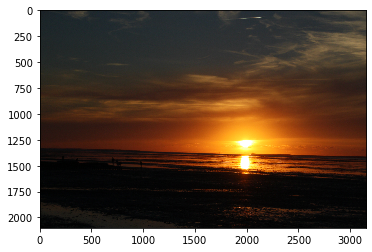

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1363.JPG
img = cv2.imread('IMG_1363.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

1570


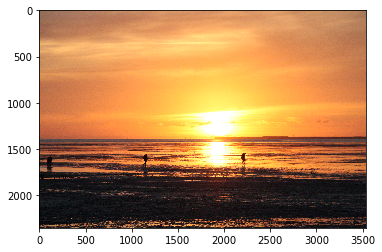

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/Horizon/Sunset/IMG_1370.JPG
img = cv2.imread('IMG_1370.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = crop_img(img)
plt.imshow(cropped_img)

#Test Accumulator

w 245
h 248
u: 0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
u: 1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
u: 2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

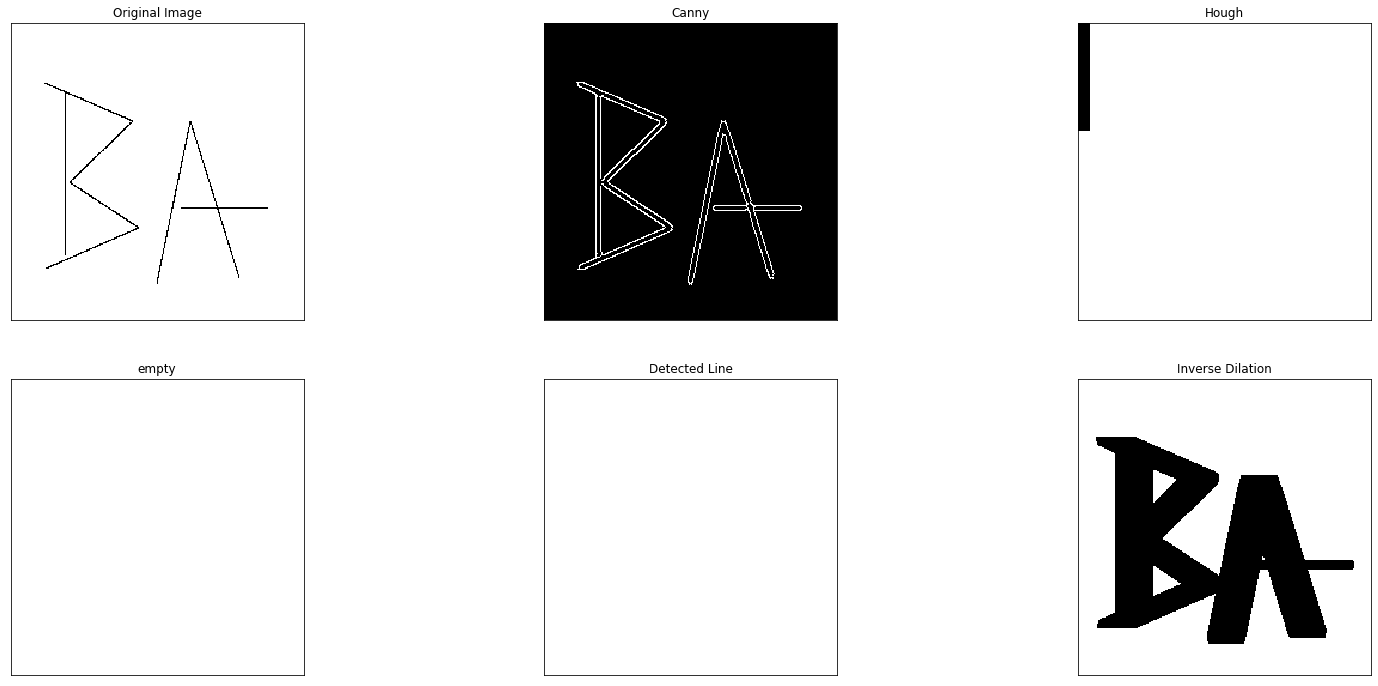

In [0]:
from math import hypot

def hough(img):

    img = im.load()
    w, h = im.size
    print('w', w)
    print('h', h)

    thetaAxisSize = w #Width of the hough space image
    rAxisSize = h #Height of the hough space image
    rAxisSize= int(rAxisSize/2)*2 #we make sure that this number is even

    houghed_img = Image.new("L", (thetaAxisSize, rAxisSize), 255) #legt Bildgroesse fest
    pixel_houghed_img = houghed_img.load()

    max_radius = hypot(w, h)
    d_theta = np.pi / thetaAxisSize
    d_rho = max_radius / (rAxisSize/2) 

    #Accumulator
    for x in range(0, w):
        for y in range(0, h):

            treshold = 0
            col = img[x, y]
            if col <= treshold: #determines for each pixel at (x,y) if there is enough evidence of a straight line at that pixel.

                for vx in range(0, thetaAxisSize):
                    theta = d_theta * vx #angle between the x axis and the line connecting the origin with that closest point.
                    rho = x*np.cos(theta) + y*np.sin(theta) #distance from the origin to the closest point on the straight line
                    vy = rAxisSize/2 + int(rho/d_rho+0.5) #Berechne Y-Werte im hough space image
                    pixel_houghed_img[vx, vy] += 1 #voting

                    #threshold = 15  # minimum number of votes (intersections in Hough grid cell)
                    #min_line_length = int(width*0.05)  # minimum number of pixels making up a line
                    #max_line_gap = 80  # maximum gap in pixels between connectable line segments
                    #line_image = np.copy(img) * 0  # creating a blank to draw lines on

                    # Run Hough on edge detected image
                    # Output "lines" is an array containing endpoints of detected line segments
                    #lines = cv2.HoughLinesP(dilation, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

    return houghed_img, rAxisSize, d_rho, d_theta 

def find_maxima(houghed_img, rAxisSize, d_rho, d_theta):

    w, h = houghed_img.size
    pixel_houghed_img = houghed_img.load()
    maxNumbers = 9
    ignoreRadius = 10
    maxima = [0] * maxNumbers
    rhos = [0] * maxNumbers
    thetas = [0] * maxNumbers

    for u in range(0, maxNumbers):

        print('u:', u)
        value = 0 
        xposition = 0
        yposition = 0

        #find maxima in the image
        for x in range(0, w):
            for y in range(0, h):

                if(pixel_houghed_img[x,y] > value):

                    value = pixel_houghed_img[x, y]
                    xposition = x
                    yposition = y

        #Save Maxima, rhos and thetas
        maxima[u] = value
        rhos[u] = (yposition - rAxisSize/2) * d_rho
        thetas[u] = xposition * d_theta

        pixel_houghed_img[xposition, yposition] = 0

        #Delete the values around the found maxima
        radius = ignoreRadius

        for vx2 in range (-radius, radius): #checks the values around the center
            for vy2 in range (-radius, radius): #checks the values around the center
                x2 = xposition + vx2 #sets the spectated position on the shifted value 
                y2 = yposition + vy2

                if not(x2 < 0 or x2 >= w):
                    if not(y2 < 0 or y2 >= h):

                        pixel_houghed_img[x2, y2] = 0
                        print(pixel_houghed_img[x2, y2])

    print('max', maxima)
    print('rho', rhos)
    print('theta', thetas)

    return maxima, rhos, thetas

#! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/goodhorizon.jpg
! wget -q https://i.stack.imgur.com/mZc0q.png
img = cv2.imread('mZc0q.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#laplacian = cv2.Laplacian(img,cv2.CV_64F)
blur = cv2.GaussianBlur(gray, (9,9),2)
edges = cv2.Canny(blur,50,150,apertureSize = 3)

kernel = np.ones((2,10),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 3)
dilation_inv = cv2.bitwise_not(dilation)

im = Image.open('mZc0q.png').convert("L")
houghed_img, rAxisSize, d_rho, d_theta = hough(dilation_inv)
#houghed_img.save("houghspace.bmp")

img_copy = np.ones(img.shape)

maxima, rhos, thetas = find_maxima(houghed_img, rAxisSize, d_rho, d_theta)

for t in range(0, len(maxima)):
    a = np.cos(thetas[t])
    b = np.sin(thetas[t])
    x = a * rhos[t]
    y = b * rhos[t]
    pt1 = (int(x + 1000*(-b)), int(y + 1000*(a)))
    pt2 = (int(x - 1000*(-b)), int(y - 1000*(a)))
    img_lines = cv2.line(img_copy, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

titles = ['Original Image', 'Canny',
            'Hough', 'empty', 'Detected Line', 'Inverse Dilation']
images = [img, edges, houghed_img, img_copy, img_lines, dilation_inv]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=3.5)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
#plt.imshow(img_lines)

In [0]:

hough(img)

# Detect Circles

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/circle.png
img = cv2.imread('circle.png')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
median = cv2.medianBlur(gray, 5)
plt.imshow(median, 'gray')

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(circles)
for (x, y, r) in detected_circles[0,:]:
  img_circle = cv2.circle(output, (x, y), r, (0, 255, 0), 3)
  cv2.circle(output, (x, y), 2, (255, 0, 0), 3) 

plt.imshow(img_circle)



In [0]:
! wget -q https://raw.githubusercontent.com/.../Pictures/grafik.png
img = cv2.imread('snail.JPG')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, 
                           param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
print(detected_circles)
for i in circles[0,:]:
  #draw the outer circle
  img_circle = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 10)
  #draw center of circle
  img_center = cv2.circle( img, (i[0], i[1]), 2, (0, 0, 255), 5)

titles = ['Grayscale image', 'Image with circles']
rt_circle = draw_rule_of_thirds(img_circle)
images = [gray, img_circle, rt_circle]

plt.imshow(img_circle)
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray')
    plt.subplots_adjust(left=1.0, bottom=1.0, right=3.0, top=2.0)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#Cropped Images

In [0]:
img = cv2.imread("goodhorizon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rt_original = draw_rule_of_thirds(img)
plt.imshow(rt_original)

In [0]:
def crop_img(img):
  h, w, third_of_height_1, third_of_height_2, third_of_width_1, 
  third_of_width_2 = generate_image_data(img)
  img_line, edges, dilation, erosion, image_line, lines_edges, 
  lines = detect_horizon(img)
  horizon_y1 = lines[0][0][1]
  distance_horizon = third_of_height_2 - horizon_y1
  x = 0
  y = 0
  cropping_point_y = horizon_y1 + (horizon_y1//2)
  cropping_point_x = int((cropping_point_y/h)*w)
  cropped_img = img[y:cropping_point_y, x:cropping_point_x]
  return cropped_img  